In [3]:
#importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
#cargamos los datos de entrada
dataframe = pd.read_csv(r"comprar_alquilar.csv")
print(dataframe.tail(10))

     ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda  \
192      4653            1024         447           703    16952    392957   
193      3390             881         194           584    34601    304112   
194      2969             623          72           620    29663    289205   
195      4169            1292          48           333    28503    239872   
196      4054            1095         371           440    22183    223971   
197      3831             690         352           488    10723    363120   
198      3961            1030         270           475    21880    280421   
199      3184             955         276           684    35565    388025   
200      3334             867         369           652    19985    376892   
201      3988            1157         105           382    11980    257580   

     estado_civil  hijos  trabajo  comprar  
192             0      0        3        0  
193             2      2        5        0  
194   

In [18]:
#normalizamos los datos
scaler=StandardScaler()
df = dataframe.drop(['comprar'], axis=1) # quito la variable dependiente "Y"
scaler.fit(df) # calculo la media para poder hacer la transformacion
print(scaler.mean_)
print(scaler.scale_)
X_scaled=scaler.transform(df)# Ahora si, escalo los datos y los normalizo
print(X_scaled)


[4.95899505e+03 9.71584158e+02 2.11742574e+02 5.15425743e+02
 3.87496683e+04 3.73349639e+05 1.02475248e+00 1.23267327e+00
 4.49009901e+00]
[1.67869189e+03 2.71431984e+02 1.24631111e+02 1.67686462e+02
 1.73221953e+04 1.36033554e+05 8.35109045e-01 1.36444301e+00
 2.52950921e+00]
[[ 0.62012866  0.10468863 -1.69895439 ... -1.22708822  0.5623736
  -0.98441983]
 [ 1.0639266  -0.10162457 -0.71204191 ... -0.02963981  1.29527339
   0.59691461]
 [ 0.89117304  0.22626604 -0.91263388 ...  1.1678086  -0.17052619
   1.38758182]
 ...
 [-1.05736798 -0.06109876  0.51558094 ... -0.02963981  1.29527339
   1.38758182]
 [-0.96801269 -0.38530521  1.26178306 ... -0.02963981  0.5623736
   0.201581  ]
 [-0.57842363  0.68310241 -0.85646812 ... -1.22708822 -0.90342598
  -0.19375261]]


In [20]:
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=9) # Otra opción es instanciar PCA
# sólo con dimensiones nuevas hasta obtener un mínimo "explicado"
# #ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con
# las nuevas dimensiones de PCA
print(pca.singular_values_) #valores singulares de la conversion
print(pca.components_)

[23.32012997 20.57915696 14.5914482  13.93788379 13.23515641 10.11686549
  8.68139549  7.40702015  5.97862564]
[[-4.93720326e-01 -3.18228652e-01  1.23770585e-01  1.11875722e-01
  -4.44650306e-01 -4.62608605e-01  2.52278902e-01  2.59858682e-01
   2.90247540e-01]
 [ 3.06958523e-01  1.47372634e-01 -9.16409584e-02  1.11593405e-04
   2.88434882e-01  1.48984886e-01  4.69043960e-01  5.21893872e-01
   5.27155638e-01]
 [ 9.14192492e-02  3.63453156e-01  5.16144106e-01 -7.01985912e-01
  -1.91767355e-01 -1.40513292e-01  1.72884784e-01 -1.12183561e-01
   3.69101842e-02]
 [ 1.11222044e-01  8.16296251e-02  7.80267686e-01  5.90704378e-01
   2.28391302e-02  1.50085403e-01 -7.66309571e-03  7.40404830e-03
  -7.49271067e-03]
 [ 8.88965452e-02  7.63005855e-01 -2.65553621e-01  3.30743735e-01
  -2.89002223e-01 -3.65555555e-01 -1.04638865e-01  4.36678973e-02
   8.65473020e-06]
 [-7.54772584e-02  6.79027972e-02 -1.53696523e-01  1.54422329e-01
  -2.30180519e-01  2.90798556e-01  7.67069963e-01 -3.87963615e-01
  

In [7]:
#Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))

shape of X_pca (202, 9)
[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]
suma: 0.852406211771431


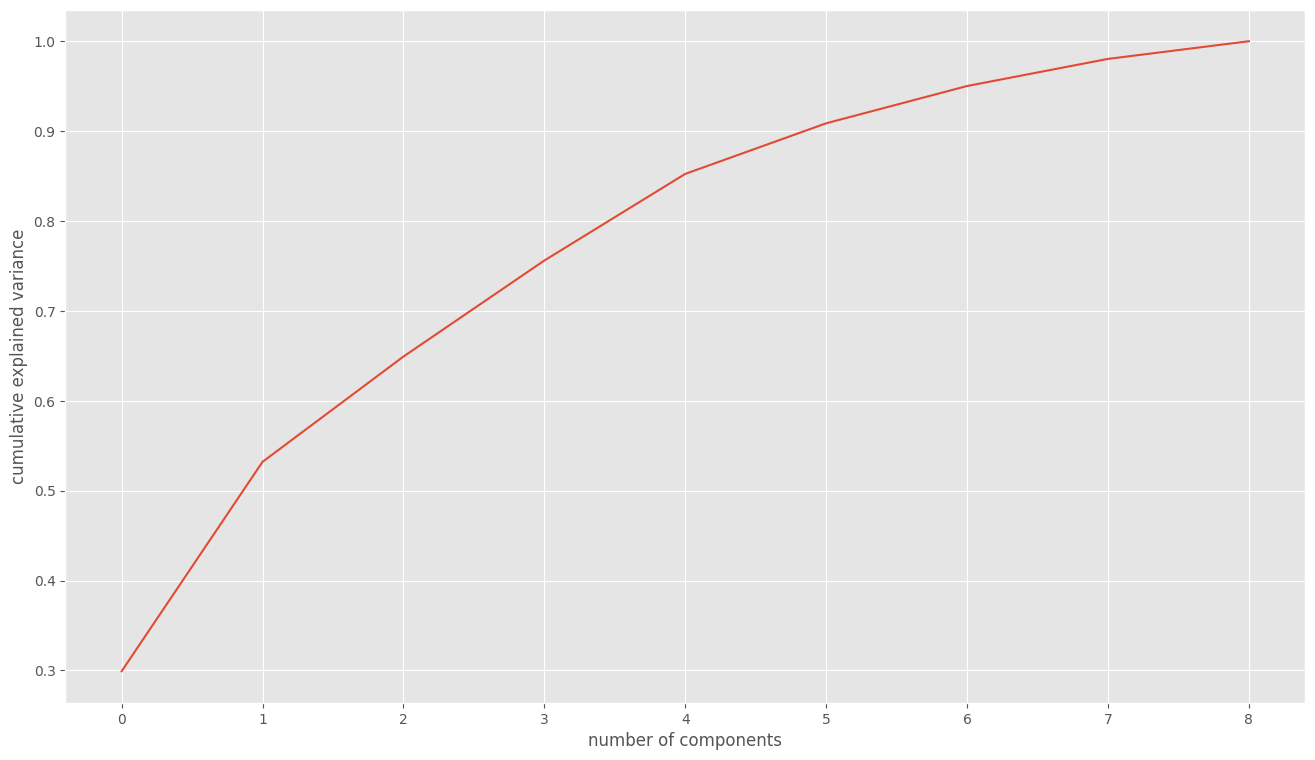

In [8]:
#graficamos el acumulado de varianza explicada
# en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

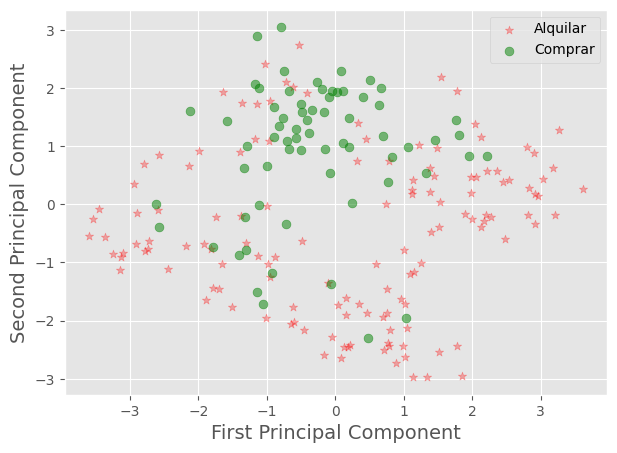

In [9]:
#graficamos en 2 Dimensiones, tomando los 2 primeros componentes principales
Xax=X_pca[:,0] #dimension de la primera componenete
Yax=X_pca[:,1] #segunda dim.
labels=dataframe['comprar'].values #crea tabla con los datos de compra
cdict={0:'red',1:'green'} #ceros de color rojo y 1 color verde
labl={0:'Alquilar',1:'Comprar'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()